In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

zillow = pd.read_csv('../../data/zillow_full_imputed.csv')

In [2]:
#zillow.columns
features = zillow[['PersonalIncome', 'Vol_moderate_income',
                   'Vol_low_income', 'total_pop', 'households', 'median_age',
                   'median_income', 'income_per_capita', 'gini_index', 'pct_poverty',
                   'housing_availability', 'home_density', 'pct_employed',
                   'pct_jobs_nightlife', 'pct_unemployed', 'move_within_city',
                   'move_new_city', 'avg_commute_time', 'pct_college']]

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_feats = pd.DataFrame(scaler.fit_transform(features),columns=features.columns)
scaled_feats.head()

,PersonalIncome,Vol_moderate_income,Vol_low_income,total_pop,households,median_age,median_income,income_per_capita,gini_index,pct_poverty,housing_availability,home_density,pct_employed,pct_jobs_nightlife,pct_unemployed,move_within_city,move_new_city,avg_commute_time,pct_college
0,-0.483885,-2.303187,-2.555039,2.052326,3.096986,0.677914,0.395570,1.127500,2.090545,-0.116861,0.165373,-0.951186,-0.203258,-0.502295,0.218105,0.557787,-0.131412,-0.253440,0.459031
1,-0.483885,-2.303187,-2.555039,0.708930,2.065297,1.069040,1.794826,2.899726,1.450117,-0.854462,0.768800,-1.658710,0.635772,-0.646796,-0.606914,0.220614,-0.386784,-0.603104,1.019498
2,-0.483885,-2.303187,-2.555039,1.264424,2.046087,1.127709,-1.178083,-0.401966,1.861821,1.410115,-0.524889,-0.909010,-0.314296,1.564514,0.339607,-0.408679,-0.828548,-0.196208,-0.075481
3,-0.483885,-2.303187,-2.555039,2.382845,2.446985,-0.612804,-0.669162,-0.655060,-0.261799,0.216671,-0.271246,0.058214,-0.382420,-0.115327,0.407477,-0.598288,-0.990002,1.160614,-0.619263
4,-0.483885,-2.303187,-2.555039,2.535674,2.446860,-0.808367,-1.141751,-0.920356,0.053137,1.436812,-0.650615,0.242537,-2.372156,0.573144,2.389787,0.799210,-1.038250,1.299683,-1.127515


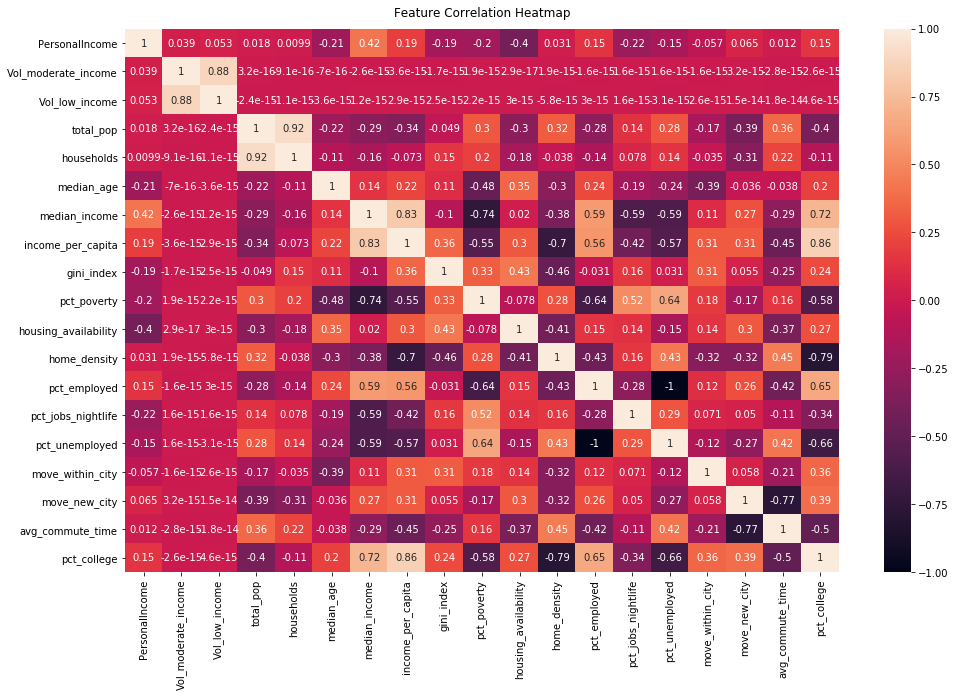

In [5]:
import seaborn as sns
# try a correlation heat map to assess for multicollinearity

plt.figure(figsize=(16, 10)) # larger for ease of viewing

heatmap = sns.heatmap(features.corr(), vmin=-1, vmax=1, annot=True)
# vmin/vmax are for the -1 to 1 on legend; annot=True lists corr vals in squares
heatmap.set_title('Feature Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [6]:
# removing a few feats that don't seem to be correlated:
# pct employed vs unemployed -> we only need to have the unemployed column (1-unemployed = employed)
# low/moderate income -> only really correlated with one another

df = features.drop(['Vol_moderate_income','Vol_low_income','pct_employed'],axis=1)

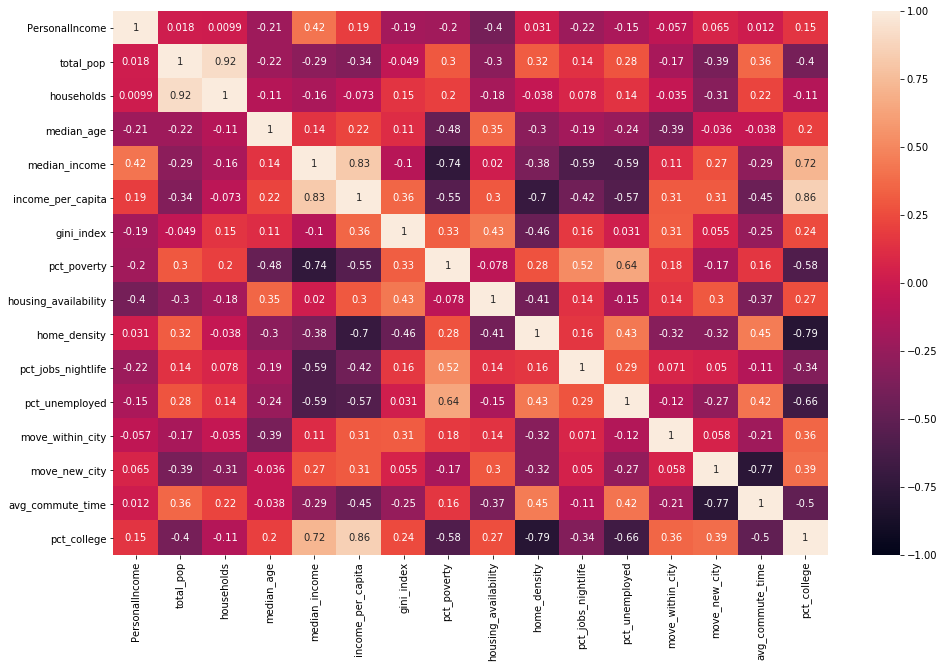

In [7]:
plt.figure(figsize=(16,10)) # larger for ease of viewing

#heatmap = sns.heatmap(features.corr(), vmin=-1, vmax=1, annot=True)
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

# trying a subset

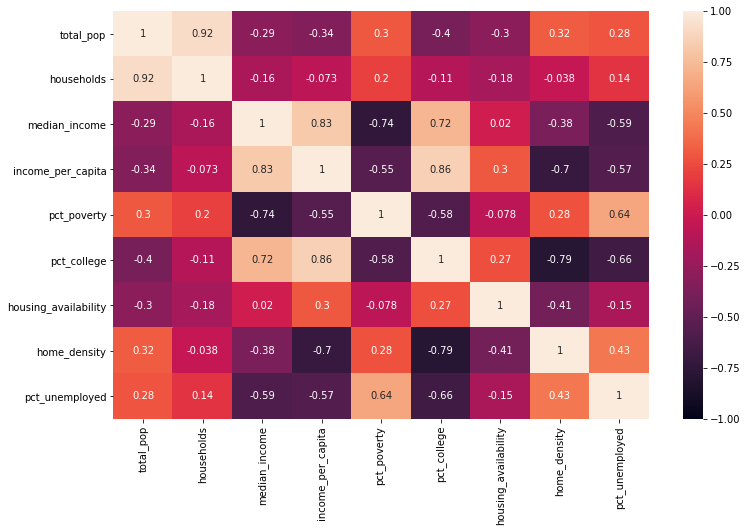

In [29]:
plt.figure(figsize=(12,7.5))
housing_feats = df[['total_pop','households','median_income','income_per_capita','pct_poverty','pct_college','housing_availability',
           'home_density','pct_unemployed']]
sns.heatmap(housing_feats.corr(),vmin=-1, vmax=1, annot=True)

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=9) # 10 features
pca.fit(housing_feats)

PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [32]:
pca.explained_variance_ratio_

array([7.19522433e-01, 2.15154523e-01, 6.36455663e-02, 1.67747749e-03,
       2.07683809e-11, 4.94966267e-12, 1.33380512e-12, 4.41112184e-13,
       1.36401750e-13])

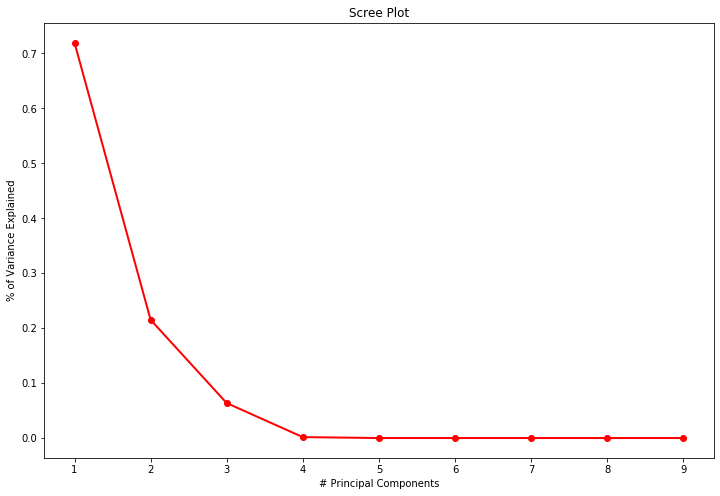

In [33]:
plt.figure(figsize=(12, 8))
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('# Principal Components')
plt.ylabel('% of Variance Explained')
plt.show() # we should use 3 principal components

In [34]:
pca.set_params(n_components=3)
pca.fit(housing_feats)
housing_pca = pca.transform(housing_feats)

Text(0, 0.5, 'PC 2')

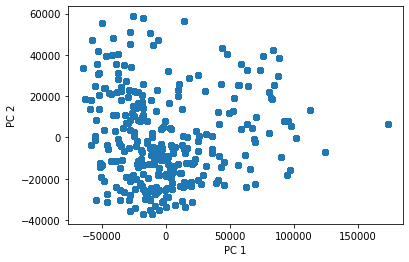

In [35]:
plt.scatter(housing_pca[:,0],housing_pca[:,1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')

Text(0, 0.5, 'PC 3')

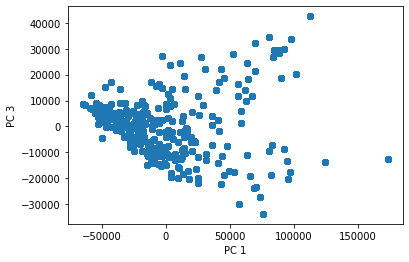

In [36]:
plt.scatter(housing_pca[:,0],housing_pca[:,2])
plt.xlabel('PC 1')
plt.ylabel('PC 3')

Text(0, 0.5, 'PC 3')

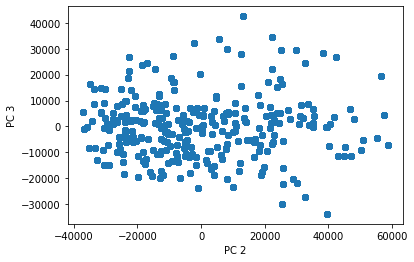

In [37]:
plt.scatter(housing_pca[:,1],housing_pca[:,2])
plt.xlabel('PC 2')
plt.ylabel('PC 3')

# analyze the features that were not in the PCA

In [16]:
df2 = df.drop(['total_pop','households','median_income','income_per_capita','pct_poverty','pct_college','housing_availability',
           'home_density','pct_unemployed'],axis=1) # remove features in the PCA

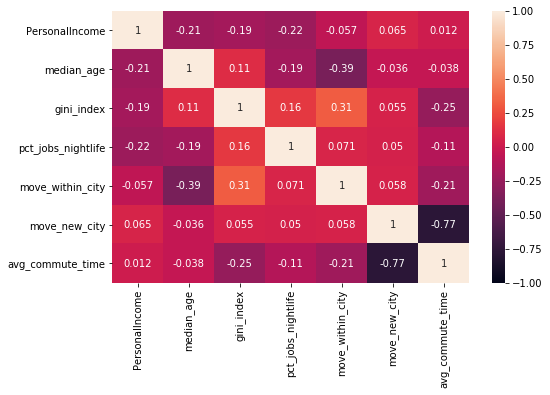

In [17]:
plt.figure(figsize=(8,5))
sns.heatmap(df2.corr(),vmin=-1, vmax=1, annot=True)

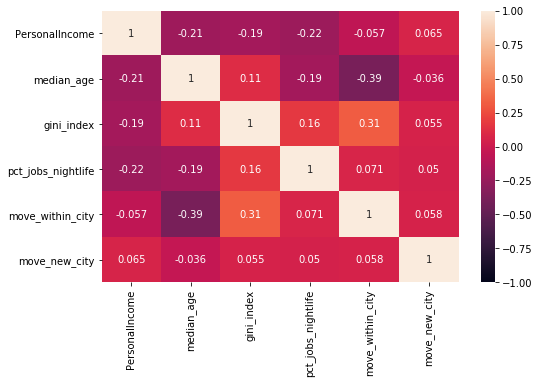

In [18]:
temp = df2.drop(['avg_commute_time'],axis=1)
plt.figure(figsize=(8,5))
sns.heatmap(temp.corr(),vmin=-1, vmax=1, annot=True)

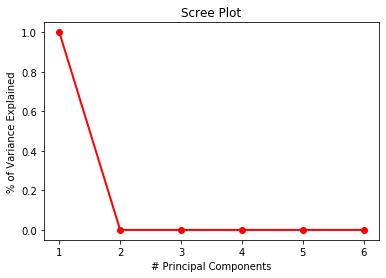

In [19]:
pca.set_params(n_components=6)
pca.fit(temp)

# plt.figure(figsize=(12, 8))
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('# Principal Components')
plt.ylabel('% of Variance Explained')
plt.show() # we can use 1 PC

Text(0, 0.5, 'ZRI')

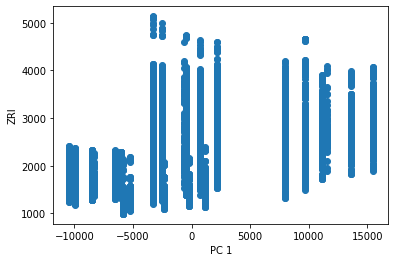

In [20]:
pca.set_params(n_components=1)
pca.fit(temp)
income_pca = pca.transform(temp)
plt.scatter(income_pca,zillow['Rent'])
plt.xlabel('PC 1')
plt.ylabel('ZRI')

In [48]:
feats = features.drop(['total_pop','households','median_income','income_per_capita','pct_poverty','pct_college',
                       'housing_availability','home_density','pct_unemployed'],axis=1) # drop housing features

feats = feats.drop(['PersonalIncome','median_age','gini_index','pct_jobs_nightlife',
                    'move_within_city','move_new_city'],axis=1) # drop income features
feats = feats.drop('pct_employed',axis=1) # redundant w/ unemployement data


In [46]:
incomePC = pd.DataFrame(income_pca, columns=['IncomePC'])

In [47]:
housingPC = pd.DataFrame(housing_pca, columns = ['Housing_PC1','Housing_PC2','Housing_PC3'])

In [54]:
pd.concat((feats,incomePC,housingPC),axis=1)

,Vol_moderate_income,Vol_low_income,avg_commute_time,IncomePC,Housing_PC1,Housing_PC2,Housing_PC3
0,3.825176e+09,7.265682e+08,30.096886,-3277.197076,14123.027668,56591.724638,19352.029476
1,3.825176e+09,7.265682e+08,27.057535,-3277.197396,83903.497863,42358.318902,26994.802010
2,3.825176e+09,7.265682e+08,30.594358,-3277.197444,-42798.523814,21116.818545,17295.147624
3,3.825176e+09,7.265682e+08,42.388151,-3277.196021,-41224.758161,48176.446274,2826.285018
4,3.825176e+09,7.265682e+08,43.596975,-3277.195861,-57641.774219,46927.862671,6576.188014
...,...,...,...,...,...,...,...
17746,4.409927e+09,8.911916e+08,45.186076,-662.996198,-11260.285108,-24551.472093,-13913.417336
17747,4.409927e+09,8.911916e+08,46.974765,-662.996406,-272.715121,-29007.131203,-14757.873095
17748,4.409927e+09,8.911916e+08,40.697500,-662.996997,7428.060457,-32684.965595,-12768.506271
17749,4.409927e+09,8.911916e+08,28.097646,-662.995734,94756.626000,-18255.870092,-13459.913155


In [61]:
zillow_temp = zillow.drop(['PersonalIncome', 'total_pop', 'households', 'median_age',
                   'median_income', 'income_per_capita', 'gini_index', 'pct_poverty',
                   'housing_availability', 'home_density', 'pct_employed',
                   'pct_jobs_nightlife', 'pct_unemployed', 'move_within_city',
                   'move_new_city','pct_college'],axis=1)
new_zillow = pd.concat((zillow_temp,incomePC,housingPC),axis=1)

In [65]:
#new_zillow.to_csv('../../data/zillowPCA.csv',index=False)